## Importing data from IMDB

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data.shape

(25000,)

In [5]:
train_data[3] # Un review

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


In [7]:
train_labels[3] # Es un review positivo

1

In [26]:
# Original "text" review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(num_review):
    #print("Num Review:", num_review)
    decoded_review = ' '.join([reverse_word_index.get(x - 3, '?') for x in num_review])
    return decoded_review

print("Review 3: ", decode_review(train_data[3]))
#word_index
#reverse_word_index[10]


Review 3:  ? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before hi

## Preprocessing of the Data
Converting them to a one-hot encoding (dummy dichotomic variable)

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    #for i, sequence in enumerate(sequences):
    #    results[i, sequence] = 1
    for i in range(sequences.shape[0]):
        for num in sequences[i]:
            results[i, num] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [29]:
x_train[100,:]

array([0., 1., 1., ..., 0., 0., 0.])

In [30]:
x_train[176,:]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
print(x_train[160,206])


0.0


In [33]:
# Preprocess labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

## Neural Network

In [44]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#model.compile(optimizer='rmsprop',
#    loss='binary_crossentropy',
#    metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#    loss='binary_crossentropy',
#    metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])


In [45]:
# Validation Set from the training Set.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
# Training...
epochs = 20
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.5224 - binary_accuracy: 0.7836 - val_loss: 0.3938 - val_binary_accuracy: 0.8667
Epoch 2/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.3159 - binary_accuracy: 0.8980 - val_loss: 0.3164 - val_binary_accuracy: 0.8806
Epoch 3/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.2300 - binary_accuracy: 0.9254 - val_loss: 0.2791 - val_binary_accuracy: 0.8921
Epoch 4/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1810 - binary_accuracy: 0.9395 - val_loss: 0.2893 - val_binary_accuracy: 0.8818
Epoch 5/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1435 - binary_accuracy: 0.9530 - val_loss: 0.3010 - val_binary_accuracy: 0.8827
Epoch 6/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1185 - binary_accuracy: 0.9618 - val_loss: 0.2913 - val_binary_a

In [67]:
# Plotting training process
import matplotlib.pyplot as plt

def plot_history_loss(history, epochs):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, epochs + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_history_acc(history, epochs):
    history_dict = history.history
    loss_values = history_dict['binary_accuracy']
    val_loss_values = history_dict['val_binary_accuracy']
    epochs = range(1, epochs + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training')
    plt.plot(epochs, val_loss_values, 'b', label='Validation')
    plt.title('Training and validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()
    
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

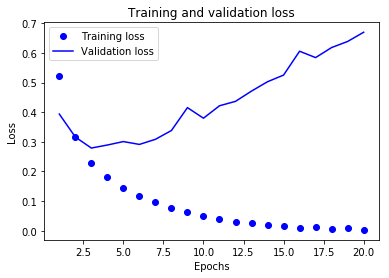

In [68]:
plot_history_loss(history, epochs)

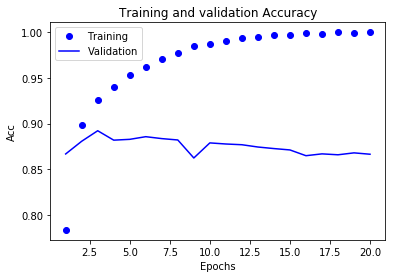

In [69]:
plot_history_acc(history, epochs)

In [70]:
# Overfit detectado, el validation accuracy no mejora.


In [75]:
# Veamos en el testing.
# Un caso.
label = model.predict_classes(x_test[45:46])
print("Label obtenido", label[0][0], "y label correcto", y_test[45])

Label obtenido 1 y label correcto 1.0


In [76]:
# Testing set metrics.
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

25000/25000 [==============================] - 2s 71us/step


0.8508